# **Introduction to your AI4ALL Personal Project**



---


In this project you will:


*   Examine and select an open dataset from Kaggle
*   Read your dataset in using Pandas and google sheets
* Look up and change data types
* Investigate patterns in the data
* Create features (feature engineering)
* Test different machine learning algorithms
* Evaluate how well your algorithms work



---
You may need to do your own research to adapt some parts of this code to your own project/dataset. Part of learning to code is learning how to google things really well when you encounter something new! Stack overflow is a good website to look at where people post problems they're having and get help from others. 


---

# **PART 1**

---



In [0]:
# Connecting your google drive with colab so you can access data from spreadsheets
# You will need to run this code and enter a key to authenticate every day/session
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [0]:
# Import the python packages we want to use
# Pandas helps us explore and manipulate the data
# Matplotlib helps us to graph and plot the data
import pandas as pd
import matplotlib.pyplot as plt



---



---


Next, you need to call the specific google spreadsheet you want to work with. The first spreadsheet is from goodreads. Goodreads is a website where people can rate and leave reviews for books. Read more about this dataset and what type of data is in each column here: https://www.kaggle.com/jealousleopard/goodreadsbooks


---


This notebook will step through the goodreads dataset, but you should also see if you can apply and adapt this code to a new dataset for your personal project.


---


You should investigate each of the other three datasets, then select one to use.


*   Pokemon: https://www.kaggle.com/abcsds/pokemon
*   World Happiness Report 2019: https://www.kaggle.com/unsdsn/world-happiness
* Olympics: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results


---
To use a different dataset, comment out (type # in front of) the goodreads line and uncomment (take away the #) the dataset you want to use. Since you are naming that dataset wb (short for "work book") on each line, the rest of the code will work no matter which dataset you use.


---






In [0]:
# Goodreads data
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1nnjEpRJ-LeCer_Yy8mB5Mob7-8JZ7Wn7bk2d2QwxCts/edit#gid=2131638054')

# Pokemon data
#wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/12ijtfaDvM7jIZK3yyyr_v_P858dIKhVdl7FhH_1Bm1k/edit#gid=1035266987')

# World Happiness Report 2019 data
#wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1bwIXIzmE77O1Gsmp3_H3vveAExYyZ17mkGagq-4PNtY/edit#gid=906238556')

# Olympics data
#wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1SuHeBfBeMbvPIQwHQUnvNCpOUrCLrjGAhKExaLREHYA/edit#gid=709589584')

In [0]:
# Import your data into a Pandas data frame
# You may have to change the name of the sheet to match the sheet you are pulling from your spreadsheet - pay attention to capitalization!
sheet = wb.worksheet('data1') #change this sheet name for a new dataset
data = sheet.get_all_values()

# Pandas stores data in a 'data frame'
df = pd.DataFrame(data)

# Set the headings
df.columns = df.iloc[0]
df = df.iloc[1:]

# Print the first few lines of the data frame to check that everything looks good
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
1,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
5,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [0]:
# Check the data types in your data frame. Are they all correct? 
# Usually pandas imports everything as an object, which means you will need to tell is which data type each column should be.
# You should do this so you can do math with data that includes numbers, etc.

df.dtypes

0
bookID                object
title                 object
authors               object
average_rating        object
isbn                  object
isbn13                object
language_code         object
num_pages             object
ratings_count         object
text_reviews_count    object
publication_date      object
publisher             object
dtype: object



---



---


For more information about data types in pandas, and what the options for data types are, read this: https://pbpython.com/pandas_dtypes.html


---



In [0]:
# creating a dictionary for the goodreads data to set each column to the data type it should be

new_df = {
    'Book ID': df['bookID'].astype(int),
    'Title': df['title'].astype(str),
    'Authors': df['authors'].astype(str),
    'Avg Rating': df['average_rating'].astype(float),
    'Language': df['language_code'].astype(str),
    'Num Pages': df['num_pages'].astype(int),
    'Ratings Count': df['ratings_count'].astype(int),
    'Text Reviews Count': df['text_reviews_count'].astype(int),
    #'Publication Date': df['publication_date'].astype(), 
    'Publisher': df['publisher'].astype(str)
}



---


For a challenge, you can try to convert the data type for publication date. 

Hint: you will have to manipulate the data before giving it a type. There are multiple ways you might convert this data. To think about what you want to do, first think about why you would use this data. Do you only need the year? Do you need all the information in the publication date column?


---

We've helped you do this for the Pokemon, Olympics, and World Happiness Report data with the code snippets below. If you're using a different dataset, you'll have to do this yourself.


---



---



In [0]:
# Olympics data

# Missing data for olympics needs to be converted in a certain way
df['Age'] = df['Age'].apply(lambda x: 'NaN' if x == 'NA' else x)
df['Height'] = df['Age'].apply(lambda x: 'NaN' if x == 'NA' else x)
df['Weight'] = df['Age'].apply(lambda x: 'NaN' if x == 'NA' else x)

# Data Types
new_df = {
    'Name': df['Name'].astype(str),
    'Sex': df['Sex'].astype(str),
    'Age': df['Age'].astype(float),
    'Height': df['Height'].astype(float),
    'Weight': df['Weight'].astype(float),
    'Team': df['Team'].astype(str),
    'NOC': df['NOC'].astype(str),
    'Games': df['Games'].astype(str),
    'Year': df['Year'].astype(int),
    'Season': df['Season'].astype(str),
    'City': df['City'].astype(str),
    'Sport': df['Sport'].astype(str),
    'Event': df['Event'].astype(str),
    'Medal': df['Medal'].astype(str)
}

If you are working with a dataset that has missing data, you'll have to decide what to do with the missing values. Read more about what you can do in pandas with missing data here: https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/

In [0]:
# World Happiness 2019 data
new_df = {
    'Rank': df['Overall rank'].astype(int),
    'Country': df['Country or region'].astype(str),
    'Score': df['Score'].astype(float),
    'GDP': df['GDP per capita'].astype(float),
    'SocialSupport': df['Social support'].astype(float),
    'Health': df['Healthy life expectancy'].astype(float),
    'Freedom': df['Freedom to make life choices'].astype(float),
    'Generosity': df['Generosity'].astype(float),
    'Corruption': df['Perceptions of corruption'].astype(float)
}

In [0]:
# Pokemon data
new_df = {
    'Name': df['Name'].astype(str),
    'Type1': df['Type 1'].astype(str),
    'Type2': df['Type 2'].astype(str),
    'Total': df['Total'].astype(int),
    'HP': df['HP'].astype(int),
    'Attack': df['Attack'].astype(int),
    'Defense': df['Defense'].astype(int),
    'SpecialAttack': df['Sp. Atk'].astype(int),
    'SpecialDefense': df['Sp. Def'].astype(int),
    'Speed': df['Speed'].astype(int),
    'Generation': df['Generation'].astype(int),
    'Legendary': df['Legendary'].astype(bool)
}

In [0]:
# Now let's look at the goodreads data again

books_df = pd.DataFrame(new_df)
books_df.head()

,Book ID,Title,Authors,Avg Rating,Language,Num Pages,Ratings Count,Text Reviews Count,Publisher
1,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,Scholastic Inc.
2,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,Scholastic Inc.
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,Scholastic
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,Scholastic Inc.
5,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,Scholastic


In [0]:
# And check to make sure all our data types are correct
books_df.dtypes

Book ID                 int64
Title                  object
Authors                object
Avg Rating            float64
Language               object
Num Pages               int64
Ratings Count           int64
Text Reviews Count      int64
Publisher              object
dtype: object



---


Next, we want to explore the data. What are some patterns we can observe? These patterns might help us decide what types of data to use in machine learning later.

Use the column name inside the brackets, and try using 'describe' to understand your dataset. Some examples from the goodreads set are below. Notice how the same code - 'describe' - has different output when the data type is different.


---
You can read more about grouping and exploring your data here: https://realpython.com/pandas-python-explore-dataset/  

and here: https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas


---



---




In [0]:
books_df['Authors'].describe()

count              11127
unique              6643
top       P.G. Wodehouse
freq                  40
Name: Authors, dtype: object

In [0]:
books_df['Language'].describe()

count     11127
unique       27
top         eng
freq       8911
Name: Language, dtype: object

In [0]:
books_df['Publisher'].describe()

count       11127
unique       2292
top       Vintage
freq          318
Name: Publisher, dtype: object

In [0]:
books_df['Avg Rating'].describe()

count    11127.000000
mean         3.933631
std          0.352445
min          0.000000
25%          3.770000
50%          3.960000
75%          4.135000
max          5.000000
Name: Avg Rating, dtype: float64



---


You can also use matplotlib to make some graphs. Read more about how to do that 

here: https://ourcodingclub.github.io/tutorials/pandas-python-intro/#matplotlib 

and here: https://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot


---



---



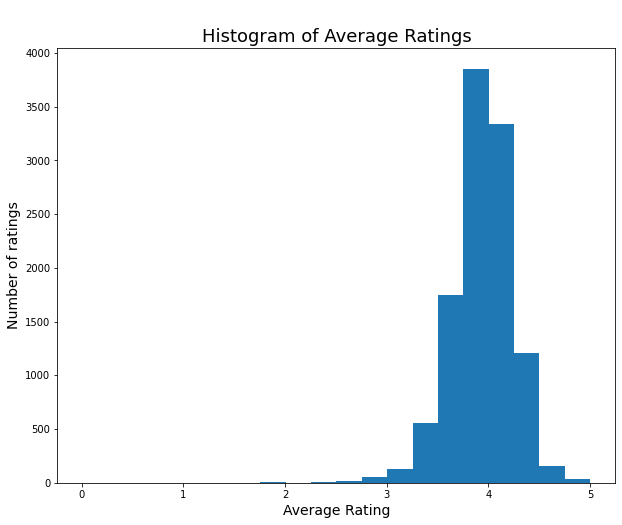

In [0]:
plt.figure(figsize=(10,8))
plt.hist(books_df['Avg Rating'], bins=20, range=(0.01, 5))
plt.title('\nHistogram of Average Ratings', fontsize=18)
plt.ylabel('Number of ratings', fontsize=14)
plt.xlabel('Average Rating', fontsize=14)
plt.show()

In [0]:
books_df['Num Pages'].describe()

count    11127.000000
mean       336.376921
std        241.127305
min          0.000000
25%        192.000000
50%        299.000000
75%        416.000000
max       6576.000000
Name: Num Pages, dtype: float64

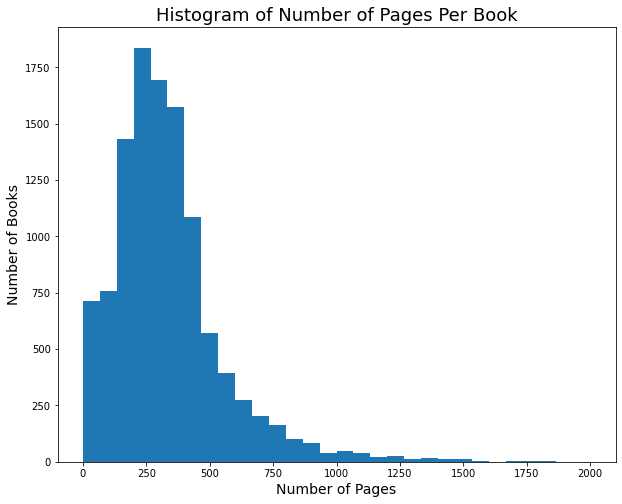

In [0]:
plt.figure(figsize=(10,8))
plt.hist(books_df['Num Pages'], bins=30,range=(0,2000)) # Set the highest page number at 2000. There are some books with more pages, but they're outliers.
plt.title('Histogram of Number of Pages Per Book', fontsize=18)
plt.ylabel('Number of Books', fontsize=14)
plt.xlabel('Number of Pages', fontsize=14)
plt.show()



---


Using groupby can be very powerful. The example below shows the average rating based on the language the book was published in. How can you use this in your dataset?

Read more about everything you can do using groupby here: https://www.bitdegree.org/learn/pandas-groupby

and here: https://www.bitdegree.org/learn/pandas-groupby

and here: https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/


---



---



In [0]:
books_df.groupby("Language")["Avg Rating"].mean()

Language
ale      4.360000
ara      3.550000
en-CA    4.025714
en-GB    3.923411
en-US    3.914422
eng      3.933546
enm      3.873333
fre      3.971528
ger      3.950101
gla      4.470000
glg      3.360000
grc      3.707273
ita      4.078000
jpn      4.268696
lat      4.353333
msa      4.110000
mul      4.126316
nl       4.180000
nor      3.600000
por      3.945000
rus      4.255000
spa      3.929312
srp      0.000000
swe      3.455000
tur      4.420000
wel      5.000000
zho      4.456429
Name: Avg Rating, dtype: float64



---

# **PART 2**

---


Next, we'll do some feature engineering. Feature engineering is just a fancy way of saying that you're editing existing columns or creating some new columns based on the existing data. Sometimes you'll use mathematical functions to create your new columns, and sometimes you'll combine data in other ways.



---


You won't be done with feature engineering at this point. This is just a start, since you may want to change your features after you start using this data in machine learning models.


---



---



For more information about feature engineering using pandas read here: 

https://heartbeat.fritz.ai/a-practical-guide-to-feature-engineering-in-python-8326e40747c8

https://medium.com/@michaelabehsera/feature-engineering-cookbook-for-machine-learning-7bf21f0bcbae

http://blog.yhat.com/tutorials/5-Feature-Engineering.html

---
On the goodreads data, we'll start with:
* Merging similar categories together
* Creating dummy variables
* Creating bins/buckets


---



I noticed there were 4 different options for "english" when exploring the language column for this dataset. 

* eng
* en-CA
* en-GB
* en-US

Since I don't think it matters which type of English the book uses, I'm going to combine them all into the same category of 'eng'.

In [0]:
books_df['Language'] = books_df['Language'].replace('en-CA','eng')
books_df['Language'] = books_df['Language'].replace('en-GB','eng')
books_df['Language'] = books_df['Language'].replace('en-US','eng')

# Check to see if this worked
books_df.groupby("Language")["Avg Rating"].mean()

Language
ale    4.360000
ara    3.550000
eng    3.930845
enm    3.873333
fre    3.971528
ger    3.950101
gla    4.470000
glg    3.360000
grc    3.707273
ita    4.078000
jpn    4.268696
lat    4.353333
msa    4.110000
mul    4.126316
nl     4.180000
nor    3.600000
por    3.945000
rus    4.255000
spa    3.929312
srp    0.000000
swe    3.455000
tur    4.420000
wel    5.000000
zho    4.456429
Name: Avg Rating, dtype: float64



---


Next, I want to turn each of the language variables into a dummy variable. This means each language will get it's own comment, and we will use 1s and 0s to document whether or not that row is (1) or is not (0) that language.


---



Read more about how to convert categorical data to numeric form here: 

https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40

https://www.analyticsvidhya.com/blog/2015/11/easy-methods-deal-categorical-variables-predictive-modeling/


---



---



In [0]:
# We create a separate dataframe with this dummy variable information
language = pd.get_dummies(books_df['Language'])
language

,ale,ara,eng,enm,fre,ger,gla,glg,grc,ita,jpn,lat,msa,mul,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11123,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11124,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11125,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11126,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# Then we merge the two dataframes together
# This way, we get to keep the original column to check our work
books_df = pd.concat([books_df,language],axis=1)
books_df.head()

,Book ID,Title,Authors,Avg Rating,Language,Num Pages,Ratings Count,Text Reviews Count,Publisher,ale,ara,eng,enm,fre,ger,gla,glg,grc,ita,jpn,lat,msa,mul,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
1,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,Scholastic Inc.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,Scholastic Inc.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,Scholastic,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,Scholastic Inc.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,Scholastic,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


One more feature we'll add now is binning. There is a wide range of page numbers and average ratings. We'll create some bins/buckets that tell us if they are in the top, middle, or bottom third of page numbers or ratings.

Read more about binning here:

https://pbpython.com/pandas-qcut-cut.html

In [0]:
# we use qcut to make sure the bins are close to even sizes
# The cuts between bins are based on quantiles

# We can make these numbers or text. Here, 1=low, 2=medium, 3=high
rating_labels = [1,2,3]

books_df['Rating_Bin'] = pd.qcut(books_df['Avg Rating'],q=3,labels=rating_labels)

# View the bins and how many data points are in each bin
pd.value_counts(books_df['Rating_Bin'])

1    3770
2    3724
3    3633
Name: Rating_Bin, dtype: int64

In [0]:
# check our work again, make sure the high ratings correspond to bin 3, etc.
books_df.head()

,Book ID,Title,Authors,Avg Rating,Language,Num Pages,Ratings Count,Text Reviews Count,Publisher,ale,ara,eng,enm,fre,ger,gla,glg,grc,ita,jpn,lat,msa,mul,nl,nor,por,rus,spa,srp,swe,tur,wel,zho,Rating_Bin
1,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,Scholastic Inc.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
2,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,Scholastic Inc.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,Scholastic,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,Scholastic Inc.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
5,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,Scholastic,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3




---
Now let's do something similar for page numbers. 


---




In [0]:
# we use qcut to make sure the bins are close to even sizes
# The cuts between bins are based on quantiles

# We can make these numbers or text. Here, 1=low, 10=high
pageNum_labels = [1,2,3,4,5,6,7,8,9,10]

books_df['PageNum_Bin'] = pd.qcut(books_df['Num Pages'],q=10,labels=pageNum_labels)

# View the bins and how many data points are in each bin
pd.value_counts(books_df['PageNum_Bin'])

4     1255
2     1147
7     1126
9     1124
6     1120
1     1118
8     1095
10    1093
3     1077
5      972
Name: PageNum_Bin, dtype: int64

In [0]:
books_df.head()

,Book ID,Title,Authors,Avg Rating,Language,Num Pages,Ratings Count,Text Reviews Count,Publisher,ale,ara,eng,enm,fre,ger,gla,glg,grc,ita,jpn,lat,msa,mul,nl,nor,por,rus,spa,srp,swe,tur,wel,zho,Rating_Bin,PageNum_Bin
1,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,Scholastic Inc.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,10
2,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,Scholastic Inc.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,10
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,Scholastic,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,7
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,Scholastic Inc.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,8
5,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,Scholastic,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,10


In [0]:
# Let's check what the cutoff points are for these bins
results, bin_edges = pd.qcut(books_df['Num Pages'],
                            q=10,
                            labels=pageNum_labels,
                            retbins=True)

results_table = pd.DataFrame(zip(bin_edges, pageNum_labels),
                            columns=['Page Number Threshold', 'Label'])
results_table

# In this example, any book with between 0-110 pages would be in the 1 category
# A book with 111 pages would be in category 2

,Page Number Threshold,Label
0,0.0,1
1,111.0,2
2,176.0,3
3,215.0,4
4,256.0,5
5,299.0,6
6,341.0,7
7,384.0,8
8,452.0,9
9,592.0,10


# **PART 3**


---
Next we'll do some clustering on our data.



---


Read more about different clustering methods here:

https://scikit-learn.org/stable/modules/clustering.html



---


We will use k-means. Read more about using k-means in python here:

https://heartbeat.fritz.ai/k-means-clustering-using-sklearn-and-python-4a054d67b187


https://benalexkeen.com/k-means-clustering-in-python/


In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [0]:
# First we decide which features to use in our clustering

# We'll use the Number of pages, the average rating, and whether or not the language is english (dummy variable)
# Clustering does not work with string variables, so converting our "language" variable
  # to numerics is useful here
cluster_data = books_df[['Num Pages','Avg Rating','eng']]

# We also have to decide how many clusters our algorithm should test for
# You can pick numbers higher or lower than these to test
range_n_clusters = [2,3,4,5,6,7,8,9,10]

# Now we'll test the data we selected in cluster_data with the number of different clusters in range_n_clusters
# Each cluster number will produce a silhouette score. Higher values are better.
for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(cluster_data)
  silhouette_avg = silhouette_score(cluster_data, cluster_labels)
  print("For n_clusters = ", n_clusters,
        "The average silhouette score is:", silhouette_avg)

For n_clusters =  2 The average silhouette score is: 0.6403785303133636
For n_clusters =  3 The average silhouette score is: 0.5427683709596308
For n_clusters =  4 The average silhouette score is: 0.5454738614510982
For n_clusters =  5 The average silhouette score is: 0.5419125412191891
For n_clusters =  6 The average silhouette score is: 0.5270518720944352
For n_clusters =  7 The average silhouette score is: 0.5324491216597749
For n_clusters =  8 The average silhouette score is: 0.5356048222232561
For n_clusters =  9 The average silhouette score is: 0.537547946907034
For n_clusters =  10 The average silhouette score is: 0.5331311159123601




---


Evaluating how good our clustering algorithm is can get a little complicated, since there is not a 'ground truth' we're trying to map to (like in classification where you can predict a variable that you already have in your data).


---


Read more about different metrics for evaluating clustering here: 

https://www.datanovia.com/en/lessons/cluster-validation-statistics-must-know-methods/


---

We'll use the silhouette coefficient. This will be a number between 0 and 1, with 1 being the best clustering and 0 being the worst. 


---




In [0]:
# Now let's try using some different data to see if we can improve our clusters

# Let's try just using the number of text reviews and the average rating
cluster_data = books_df[['Text Reviews Count','Avg Rating']]

# We also have to decide how many clusters our algorithm should test for
# You can pick numbers higher or lower than these to test
range_n_clusters = [2,3,4,5,6,7,8,9,10]

# Now we'll test the data we selected in cluster_data with the number of different clusters in range_n_clusters
# Each cluster number will produce a silhouette score. Higher values are better.
for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(cluster_data)
  silhouette_avg = silhouette_score(cluster_data, cluster_labels)
  print("For n_clusters = ", n_clusters,
        "The average silhouette score is:", silhouette_avg)

For n_clusters =  2 The average silhouette score is: 0.968837087731901
For n_clusters =  3 The average silhouette score is: 0.9379201385909186
For n_clusters =  4 The average silhouette score is: 0.9140622112011624
For n_clusters =  5 The average silhouette score is: 0.891478687579215
For n_clusters =  6 The average silhouette score is: 0.8666079359483423
For n_clusters =  7 The average silhouette score is: 0.8634592425149935
For n_clusters =  8 The average silhouette score is: 0.8371103096419287
For n_clusters =  9 The average silhouette score is: 0.8092562459064133
For n_clusters =  10 The average silhouette score is: 0.7887015108562474


Those silhouette scores are much better. But does this type of clustering mean anything? Let's see how many values are in each of the clusters for some of these options.

In [0]:
# Let's look at just a single value for our clusters in more depth
range_n_clusters = [2]

for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(cluster_data)
  silhouette_avg = silhouette_score(cluster_data, cluster_labels)
  print("For n_clusters = ", n_clusters,
        "The average silhouette score is:", silhouette_avg)
  
# This code helps us tell how many values are in each cluster  
labels = cluster_labels.tolist()
labels = pd.Series(labels,name='labels')
values = pd.value_counts(labels)

print(values)

For n_clusters =  2 The average silhouette score is: 0.968837087731901
0    11062
1       65
Name: labels, dtype: int64


It looks like most of the data is in one of the clusters. This is probably not very useful to us. Let's check out n=10 clusters.

In [0]:
range_n_clusters = [10]

for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(cluster_data)
  silhouette_avg = silhouette_score(cluster_data, cluster_labels)
  print("For n_clusters = ", n_clusters,
        "The average silhouette score is:", silhouette_avg)
  
# This code helps us tell how many values are in each cluster  
labels = cluster_labels.tolist()
labels = pd.Series(labels,name='labels')
values = pd.value_counts(labels)

print(values)

For n_clusters =  10 The average silhouette score is: 0.7887015108562474
0    9085
7    1224
9     460
4     192
2      81
8      40
6      21
1      15
5       7
3       2
Name: labels, dtype: int64




---


It looks like most of the data is still in one cluster, even for n=10 clusters. This isn't very useful, so we'll have to go back and change the data we are using to cluster on.


---



In [0]:
# Now let's try using some different data to see if we can improve our clusters
cluster_data = books_df[['Avg Rating','Num Pages','eng']]

# We also have to decide how many clusters our algorithm should test for
# You can pick numbers higher or lower than these to test
range_n_clusters = [2,3,4,5,6,7,8,9,10]

# Now we'll test the data we selected in cluster_data with the number of different clusters in range_n_clusters
# Each cluster number will produce a silhouette score. Higher values are better.
for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(cluster_data)
  silhouette_avg = silhouette_score(cluster_data, cluster_labels)
  print("For n_clusters = ", n_clusters,
        "The average silhouette score is:", silhouette_avg)

For n_clusters =  2 The average silhouette score is: 0.6403785303133636
For n_clusters =  3 The average silhouette score is: 0.5427683709596308
For n_clusters =  4 The average silhouette score is: 0.5454738614510982
For n_clusters =  5 The average silhouette score is: 0.5419125412191891
For n_clusters =  6 The average silhouette score is: 0.5270518720944355
For n_clusters =  7 The average silhouette score is: 0.532449121659775
For n_clusters =  8 The average silhouette score is: 0.5356048222232562
For n_clusters =  9 The average silhouette score is: 0.5375479469070342
For n_clusters =  10 The average silhouette score is: 0.5331311159123603


In [0]:
# These silhouette scores are a little lower, but let's check out the cluster sizes

range_n_clusters = [4]

for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(cluster_data)
  silhouette_avg = silhouette_score(cluster_data, cluster_labels)
  print("For n_clusters = ", n_clusters,
        "The average silhouette score is:", silhouette_avg)
  
# This code helps us tell how many values are in each cluster  
labels = cluster_labels.tolist()
labels = pd.Series(labels,name='labels')
values = pd.value_counts(labels)

# This looks much more useful, even though the silhouette scores are lower
print(values)

For n_clusters =  4 The average silhouette score is: 0.5454738614510982
3    4775
0    4680
1    1446
2     226
Name: labels, dtype: int64


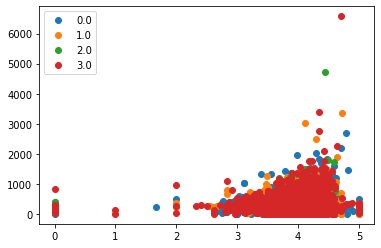

In [0]:
# Now let's make a scatter plot to see how these clusters look

# Append the cluster label (0-3) to your dataframe
cluster_data = pd.concat([cluster_data,labels],axis=1)


# We'll leave out the 'eng' data so we can plot on two axes
groups = cluster_data.groupby("labels")
for name, group in groups:
    plt.plot(group["Avg Rating"], group["Num Pages"], marker="o", linestyle="", label=name)
plt.legend()

In [0]:
# Let's also do some grouping by cluster to get statistics that are cluster specific
import numpy as np

print("Mean\n",groups.aggregate(np.mean))

print("\n Minimum Value \n",groups.aggregate(np.min))

print("\n Maximum Value \n",groups.aggregate(np.max))

Mean
         Avg Rating   Num Pages       eng
labels                                  
0.0       3.941288  288.901282  0.937821
1.0       3.947875  409.801384  0.937716
2.0       3.957212  500.486726  0.973451
3.0       3.920704  352.934660  0.958534

 Minimum Value 
         Avg Rating  Num Pages  eng
labels                            
0.0            0.0        0.0  0.0
1.0            2.0        0.0  0.0
2.0            0.0        0.0  0.0
3.0            0.0        0.0  0.0

 Maximum Value 
         Avg Rating  Num Pages  eng
labels                            
0.0           5.00     2690.0  1.0
1.0           5.00     3342.0  1.0
2.0           4.61     4736.0  1.0
3.0           5.00     6576.0  1.0




---


# **PART 4**



---


Now we'll work on some classification using our data.

Let's see if we can accurately predict whether a book was ranked in the top, middle, or bottom of this data set. This means we'll use our column "Ranking_Bin" as the ground truth that our algorithm will try to match.


---
See the many options we have in the scikit-learn package for machine learning here: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html




---




The first thing we need to do is split our data into a training set and a test set. We'll use the training set to develop our model, then use the test set to see how well our model performs on other data.

Read more about splitting between training and testing sets here: 

https://developers.google.com/machine-learning/crash-course/training-and-test-sets/splitting-data

https://medium.com/@contactsunny/how-to-split-your-dataset-to-train-and-test-datasets-using-scikit-learn-e7cf6eb5e0d


https://www.bitdegree.org/learn/train-test-split

---
Note: If your dataset has any missing data, you'll have to decide what to do with that data. Most of these algorithms do not tolerate missing data. You may want to drop all the rows where there is missing data. See here for an example:

https://www.sicara.ai/blog/2018-02-28-naive-bayes-classification-sklearn


---




In [0]:
from scipy import stats
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [0]:
# Now we'll define the inputs to our machine learning model from the rest of our dataframe. 
# We should NOT use either "Avg Rating" or "Rating_Bin" as inputs because this is the information we are trying to predict

x = books_df[['Num Pages','eng','Text Reviews Count','Ratings Count']]

# Define the targets - what we are trying to predict or classify
# Here we will try to predict "Ranking_Bin"

y = books_df[['Rating_Bin']]

In [0]:
# We'll save 20 percent of our data for testing and use 80 percent for training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)



---
First we'll use Naive Bayes


---

Read more about applying Naive Bayes using scikit-learn here:

https://heartbeat.fritz.ai/naive-bayes-classifier-in-python-using-scikit-learn-13c4deb83bcf

https://www.sicara.ai/blog/2018-02-28-naive-bayes-classification-sklearn

---




In [0]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

# This is where we set our machine learning algorithm type - Naive Bayes
model = GaussianNB()

# Fit the model with our training data
model.fit(x_train,y_train)

# Use the model to make predictions using our testing input data
y_pred = model.predict(x_test)

# Calculate the accuracy of the model as a percent
accuracy = accuracy_score(y_test,y_pred)*100
accuracy

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


36.65768194070081



---


Well, that's not very accurate. To get more accurate, we should probably use 
different data. We'll leave that to you to try with your own data. Can you beat this accuracy?


---
For now, we'll move on to a different algorithm to see if we can do any better.


---

Next we'll try an SVM, or support vector machine. Read more about this algorithm here:

https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

https://www.geeksforgeeks.org/classifying-data-using-support-vector-machinessvms-in-python/


---




In [0]:
# Import necessary package
from sklearn import svm

# Set input data (x) and target for prediction (y)
x = books_df[['Num Pages','eng','Text Reviews Count','Ratings Count']]
y = books_df[['Rating_Bin']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

# This is where we set our machine learning algorithm type - SVM
model = svm.LinearSVC()
model.fit(x_train,y_train)

# Use the model to make predictions using our testing input data
y_pred = model.predict(x_test)

# Calculate the accuracy of the model as a percent
accuracy = accuracy_score(y_test,y_pred)*100
accuracy

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


35.84905660377358



---
Next we'll try a decision tree using the scikit-learn package again. Read more about decision trees here:

https://medium.com/pursuitnotes/decision-tree-classification-in-9-steps-with-python-600c85ef56de

https://benalexkeen.com/decision-tree-classifier-in-python-using-scikit-learn/

---


In [0]:
# Import necessary package
from sklearn.tree import DecisionTreeClassifier

# Set input data (x) and target for prediction (y)
x = books_df[['Num Pages','eng','Text Reviews Count','Ratings Count']]
y = books_df[['Rating_Bin']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

# This is where we set our machine learning algorithm type - Decision Tree
model = DecisionTreeClassifier(criterion='entropy',random_state=0) 
model.fit(x_train,y_train)

# Use the model to make predictions using our testing input data
y_pred = model.predict(x_test)

# Calculate the accuracy of the model as a percent
accuracy = accuracy_score(y_test,y_pred)*100
accuracy

39.26325247079964



---
Next we'll try using a neural network, again in scikit-learn. There are also other packages for building neural networks, like neurolab.

---
 Read more about neural networks here:

 https://www.pluralsight.com/guides/machine-learning-neural-networks-scikit-learn

 https://prateekvjoshi.com/2016/01/12/how-to-train-a-neural-network-in-python-part-i/

 ---


In [0]:
# Import necessary package
from sklearn.neural_network import MLPClassifier

# Set input data (x) and target for prediction (y)
x = books_df[['Num Pages','eng','Text Reviews Count','Ratings Count']]
y = books_df[['Rating_Bin']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

# This is where we set our machine learning algorithm type - Neural Network
model = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
model.fit(x_train,y_train)

# Use the model to make predictions using our testing input data
y_pred = model.predict(x_test)

# Calculate the accuracy of the model as a percent
accuracy = accuracy_score(y_test,y_pred)*100
accuracy

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


38.095238095238095

---

If you've tried to refine the data you're using as inputs and want to improve your algorithm even more, you can read more about tuning here:

https://www.kdnuggets.com/2019/01/fine-tune-machine-learning-models-forecasting.html

---